In [1]:
# colab setting
!pip install GraphRicciCurvature

import networkx as nx
import numpy as np
import math
import importlib

# matplotlib setting
%matplotlib inline
import matplotlib.pyplot as plt

# to print logs in jupyter notebook
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

# load GraphRicciCuravture package
from GraphRicciCurvature.OllivierRicci import OllivierRicci

    100% |████████████████████████████████| 153kB 1.5MB/s 
    100% |████████████████████████████████| 819kB 3.3MB/s 
    100% |████████████████████████████████| 1.9MB 2.0MB/s 
    100% |████████████████████████████████| 163kB 950kB/s 
    100% |████████████████████████████████| 133kB 3.7MB/s 
    100% |████████████████████████████████| 3.6MB 2.6MB/s 
  Stored in directory: /Users/LS/Library/Caches/pip/wheels/fc/d6/cb/b4d2c7a686e8370ea03797dda8257753b32d0efb99e6a95c45
  Stored in directory: /Users/LS/Library/Caches/pip/wheels/4b/7d/90/39ff7dca0e5c06740afc993ab4209a1719fc1d616daf7af040
  Stored in directory: /Users/LS/Library/Caches/pip/wheels/df/d0/79/37ea880586da03c620ca9ecd5e42adbd86bc6ea84363965c5f
Successfully built networkit ecos scs


In [17]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.utils.convert import from_networkx, to_networkx
dataset = Planetoid( root='/tmp/Cora', name='Cora')

ModuleNotFoundError: No module named 'torch_sparse'

In [16]:
data = dataset[0]

NameError: name 'dataset' is not defined

In [ ]:
data_nx = to_networkx(data)
orc = OllivierRicci(data_nx, alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
G_orc = orc.G.copy()
ricci_curvatures = nx.get_edge_attributes(G_orc, "ricciCurvature")

In [6]:
print(nx.info(data_nx))

Name: 
Type: DiGraph
Number of nodes: 2708
Number of edges: 10556
Average in degree:   3.8981
Average out degree:   3.8981


In [ ]:
data_ric = from_networkx(G_orc)

In [138]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, fbeta_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score, cross_val_predict, GridSearchCV, LeaveOneOut

In [14]:
from time import time

In [15]:
cv = RepeatedStratifiedKFold(
                n_splits = 5,
                n_repeats = 5)

In [ ]:
params_grid_xgb = {'estimator__C': [1, 10, 20]}

In [ ]:
params_grid_lr = {'estimator__C': [10**(-2), 1, 10]}

In [ ]:
params_grid_rfc = {'estimator__n_estimators': [i for i in range(int(data.x.shape[0]**0.5), 
                                                        data.x.shape[0]//2, 
                                                       (data.x.shape[0]//2 - int(data.x.shape[0]**0.5)//4))

In [ ]:
scaled = StandardScaler().fit(data.x.numpy()).transform(data.x.numpy())
normalized = MinMaxScaler().fit(scaled).transform(scaled)

In [ ]:
xgb_model = GridSearchCV(OneVsRestClassifier(XGBClassifier(kernel='gbtree')), 
                         params_grid_xgb, cv=cv)
lr_model = GridSearchCV(OneVsRestClassifier(LogisticRegression(solver='liblinear')), 
                         params_grid_lr, cv=cv)
rfc_model = GridSearchCV(OneVsRestClassifier(RandomForestClassifier()), 
                         params_grid_rfc, cv=cv)
t_svm = time()
xgb_model.fit(scaled, 
              data.y.numpy())
print('XGBoost training took {}'.format(time()-t_svm))
t_lr = time()
lr_model.fit(scaled, 
              data.y.numpy())
print('LR training took {}'.format(time()-t_lr))
t_rfc = time()
rfc_model.fit(scaled, 
              data.y.numpy())
print('RFC training took {}'.format(time()-t_lr))

In [ ]:
svm_model.best_score_

In [ ]:
lr_model.best_score_

In [ ]:
f1_score(data.y[data.test_mask].numpy(), yhat, average='weighted')

0.5392738343154487

In [ ]:
clf.score(data.x[data.test_mask].numpy(), data.y[data.test_mask].numpy())

0.542

In [ ]:
loo_results = []

In [ ]:
loo = LeaveOneOut()
loo.get_n_splits(data.x.numpy())
predict = []

for train_index, test_index in loo.split(data.x.numpy()):
    X_train, X_test = data.x[train_index].numpy(), data.x[test_index].numpy()
    y_train, y_test = data.y[train_index].numpy(), data.y[test_index].numpy()
    predict.append(clf.fit(X_train, y_train).predict(X_test)[0])

tpr, fpr, fnr, tnr = (confusion_matrix(data.y.numpy(), 
                                        predict
                                        ).astype('float') 
                      /confusion_matrix(data.y.numpy(), 
                                        predict
                                        ).sum(axis=1)[:, np.newaxis]
                      ).ravel()
loo_results.append([np.round(((tpr + tnr)*100) / 2, 2), 
                    np.round(tpr*100, 2), np.round(tnr*100, 2)])
print(' acc', np.round((tpr + tnr) / 2, 2), 
    ' tpr', np.round(tpr, 2),
    ' tnr', np.round(tnr, 2)
)

<generator object BaseCrossValidator.split at 0x7fbf57516d58>


In [18]:
import pandas as pd

In [148]:
train = pd.read_fwf('../Downloads/Competition_train_ascii/Competition_train_cnt.txt', header=None)
test = pd.read_fwf('../Downloads/Competition_train_ascii/Competition_test_cnt.txt', header=None)

In [149]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,6.59375,6.59375,6.18750,6.03125,5.50000,5.37500,5.37500,4.93750,5.06250,5.31250,...,-3.90625,-3.84375,-3.00000,-2.93750,-2.31250,-1.43750,-1.09375,-0.46875,-0.21875,-0.06250
1,-6.12500,-6.06250,-5.40625,-5.25000,-4.65625,-4.34375,-4.12500,-4.09375,-4.25000,-4.50000,...,4.71875,4.43750,4.09375,4.28125,3.09375,2.43750,1.96875,1.34375,0.15625,0.65625
2,9.21875,9.75000,9.84375,10.40625,10.59375,10.06250,9.28125,9.28125,9.96875,10.15625,...,27.28125,26.90625,26.50000,26.06250,25.81250,25.09375,24.31250,22.81250,21.40625,21.09375
3,-39.34375,-39.62500,-39.46875,-39.84375,-40.56250,-40.65625,-41.15625,-41.43750,-40.46875,-39.50000,...,-20.12500,-19.81250,-19.65625,-19.56250,-19.81250,-20.00000,-20.12500,-20.75000,-21.06250,-21.18750
4,-33.06250,-31.93750,-30.40625,-29.65625,-29.81250,-29.96875,-31.18750,-32.46875,-32.68750,-32.15625,...,6.12500,6.37500,6.03125,6.21875,6.21875,6.03125,6.50000,6.21875,5.87500,5.87500


In [170]:
train.iloc[0, :].values

array([ 6.59375,  6.59375,  6.1875 , ..., -0.46875, -0.21875, -0.0625 ])

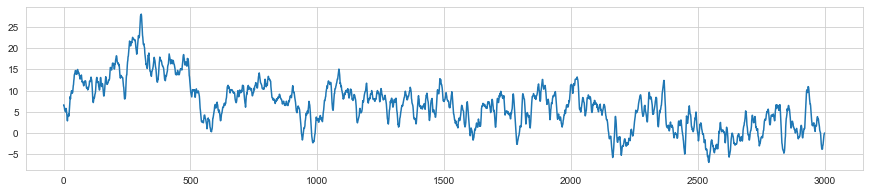

In [193]:
fig = plt.figure(figsize=(15,3))
plt.plot(train.iloc[0, :].values)
plt.savefig('1_channel', bbox_inches='tight')

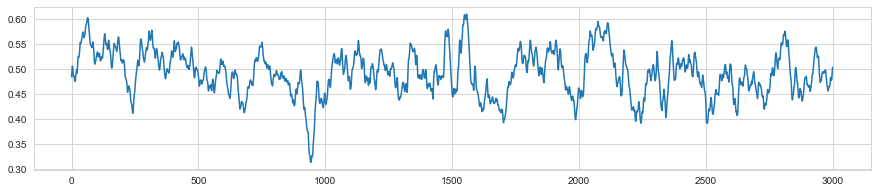

In [194]:
fig = plt.figure(figsize=(15,3))
plt.plot(a[0, :])
plt.savefig('norm', bbox_inches='tight')

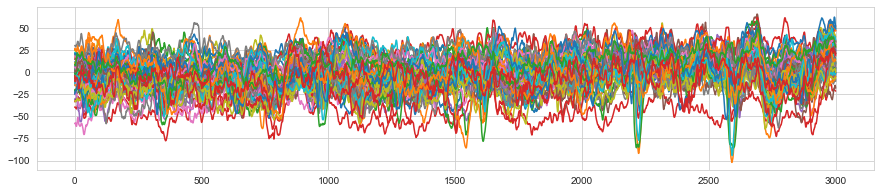

In [195]:
fig = plt.figure(figsize=(15,3))
for i in range(64):
    plt.plot(train.iloc[i, :].values)
plt.savefig('64_channel', bbox_inches='tight')

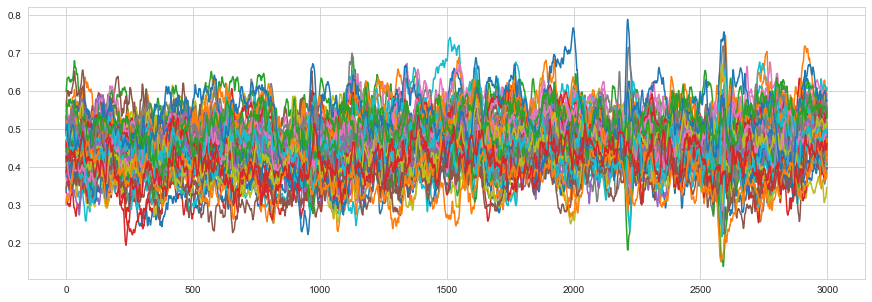

In [189]:
fig = plt.figure(figsize=(15,5))
for i in range(64):
    plt.plot(a[i, :])
plt.show()

In [243]:
train.shape

(17792, 3000)

In [ ]:
def difference(data, interval):
    return [data[i] - data[i - interval] for i in range(interval, len(data))]

In [154]:
def preproces(data):
    transformed = PowerTransformer().fit(data).transform(data)
    transformed_seasonal = difference(transformed, 12)
    transformed_trend = difference(transformed_seasonal, 1)
    scaled = StandardScaler().fit(transformed_trend).transform(transformed_trend)
    normalized = MinMaxScaler().fit(scaled).transform(scaled)
    
    return normalized

In [153]:
def aj_matrix(data, channels, coef=.5):
    samples = data.shape[0]//channels
    R = np.zeros((data.shape[0]//channels, 
                  channels, 
                  channels))
    for i in range(samples):
        for j in range(channels):
            R[i, j, :] = np.corrcoef(data[i:channels+i, :])[j]
    R[abs(R) < coef] = 0
    
    return R

In [158]:
A_05_train = aj_matrix(preproces(train), 64)
A_05_test = aj_matrix(preproces(data), 64)

In [159]:
np.save('aj_matrix_05_train', A_05_train)
np.save('aj_matrix_05_test', A_05_test)

In [162]:
A_02_train = aj_matrix(preproces(train), 64, 0.2)
A_02_test = aj_matrix(preproces(test), 64, 0.2)

In [163]:
np.save('aj_matrix_02_train', A_02_train)
np.save('aj_matrix_02_test', A_02_test)

In [164]:
A_08_train = aj_matrix(preproces(train), 64, 0.8)
A_08_test = aj_matrix(preproces(test), 64, 0.8)

In [165]:
np.save('aj_matrix_08_train', A_08_train)
np.save('aj_matrix_08_test', A_08_test)